# Correction zone stability

In [1]:
%matplotlib inline
from itertools import product as c_prdt
import matplotlib.pyplot as plt
import numpy as np

from disp import set_font_size, get_spaced_colors


N_X = 500
N_T = 1001

X_0 = np.linspace(-1, 1, 2*N_X)

T = np.linspace(0, 1, N_T)
DT = np.mean(np.diff(T))

def run(x_0_, w, h, v_f, v_s):
    x = np.nan * np.zeros(T.shape)
    x[0] = x_0_
    
    for ct, t_ in enumerate(T[1:], 1):
        
        # set v slow if in czone else fast
        if (0 <= x[ct-1] % 1 < h) and (0 <= t_ % 1 < w):
            v = v_s
        else:
            v = v_f
            
        # update x
        x[ct] = x[ct-1] + v*DT
    return x

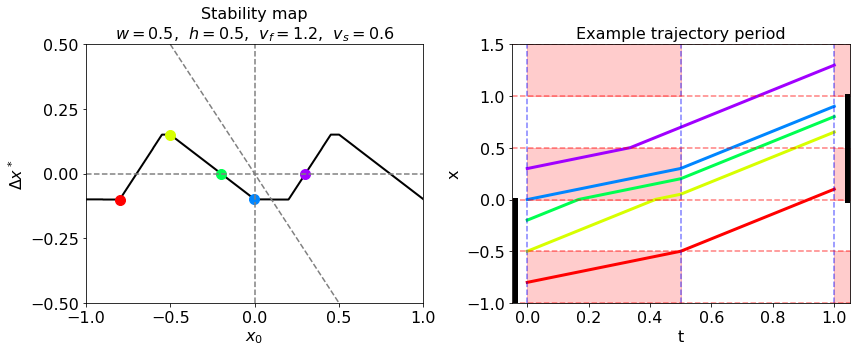

In [2]:
v_f = 1.2
v_s = .6

w = .5
h = .5

x_0_xpl = [-.8, -.5, -.2, 0, .3]

dx_s = np.nan * np.zeros(X_0.shape)
x_xpl = []

c = get_spaced_colors('hsv', len(x_0_xpl), 50/256)
cx_0_xpl = [np.argmin(np.abs(X_0 - x_0_xpl_)) for x_0_xpl_ in x_0_xpl]

for cx_0, x_0_ in enumerate(X_0):
    
    x = run(x_0_, w, h, v_f, v_s)
    dx_s[cx_0] = (x[-1] - x[0]) - 1
    
    if cx_0 in cx_0_xpl:
        x_xpl.append(x.copy())
    

fig, axs = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)

axs[0].plot(X_0, dx_s, lw=2, c='k', zorder=0)

for cx_0_, c_ in zip(cx_0_xpl, c):
    axs[0].scatter(X_0[cx_0_], dx_s[cx_0_], s=100, c=[c_], zorder=1)

axs[0].axhline(0, color='gray', ls='--')
axs[0].axvline(0, color='gray', ls='--')
axs[0].plot([-.5, .5], [.5, -.5], c='gray', ls='--')

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-.5, .5)

axs[0].set_xticks([-1, -.5, 0, .5, 1])
axs[0].set_yticks([-.5, -.25, 0, .25, .5])

axs[0].set_xlabel('$x_0$')
axs[0].set_ylabel('$\Delta x^*$')
axs[0].set_title(
    'Stability map\n$w = {},\:\:h = {},\:\:v_f = {},\:\:v_s = {}$'.format(w, h, v_f, v_s))


for t_, x_ in c_prdt((-1, 0, 1), (-1, 0, 1)):
    axs[1].fill_between([t_, t_ + w], [x_, x_], [x_ + h, x_ + h], color='r', alpha=.2)

for x, c_ in zip(x_xpl, c):
    axs[1].plot(T, x, color=c_, lw=3)
    
axs[1].axvline(0, color='b', ls='--', alpha=.5)
axs[1].axvline(w, color='b', ls='--', alpha=.5)
axs[1].axvline(1, color='b', ls='--', alpha=.5)

for x_ in (-1, 0, 1):
    axs[1].axhline(x_, color='r', ls='--', alpha=.5)
    axs[1].axhline(x_ + h, color='r', ls='--', alpha=.5)
    
axs[1].plot([-.04, -.04], [-1, 0], c='k', lw=5)
axs[1].plot([1.04, 1.04], [0, 1], c='k', lw=5)

axs[1].set_xlim(-.05, 1.05)
axs[1].set_ylim(-1, 1.5)

axs[1].set_xlabel('t')
axs[1].set_ylabel('x')
axs[1].set_title('Example trajectory period')

for ax in axs:
    set_font_size(ax, 16)